In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [5]:
# Load the dataset
data = pd.read_csv("/content/Agri-Ferti-Doc Dataset.csv")

data.head()

,Location,Crop_Name,Soil_Type,Yield,N_C,P_C,K_C,S_C,Mg_C,Zn_C,...,Mn_C,Fe_C,Cu_C,Urea,MOP,TSP,Gypsum,Hepta Zinc,Boric Acid,Magnesium Sulphate
0,Lalmonirhat,Maize,Sandy,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7
1,Rangpur,Maize,Sandy,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7
2,Rangpur,Maize,Loamy,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7
3,Dinajpur,Maize,Loamy,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7
4,Rangpur,Maize,Loamy,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7


In [6]:

# Define custom mapping for categorical data
location_mapping = {
    'Lalmonirhat': 1,
    'Rangpur': 2,
    'Dinajpur': 3,
    'Lakshmipur': 4
}

crop_mapping = {
    'Maize': 1,
    'Soyabean': 2,
    'Boro Rice': 3,
    'Aus Rice': 4,
    'Aman Rice': 5,
    'Sesame': 6
}

soil_type_mapping = {
    'Sandy': 1,
    'Loamy': 2,
    'Clayey': 3
}

# Apply one-hot encoding using the mappings and replace NaN with 0 (or another default value)
data['Location'] = data['Location'].map(location_mapping).fillna(0).astype(int)
data['Crop_Name'] = data['Crop_Name'].map(crop_mapping).fillna(0).astype(int)
data['Soil_Type'] = data['Soil_Type'].map(soil_type_mapping).fillna(0).astype(int)


data.head()

,Location,Crop_Name,Soil_Type,Yield,N_C,P_C,K_C,S_C,Mg_C,Zn_C,...,Mn_C,Fe_C,Cu_C,Urea,MOP,TSP,Gypsum,Hepta Zinc,Boric Acid,Magnesium Sulphate
0,1,1,1,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7
1,2,1,1,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7
2,2,1,2,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7
3,3,1,2,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7
4,2,1,2,10.0,226,61,121,46,16,4.1,...,0,0,0,198.9,98.0,123.5,103.5,4.6,4.0,0.7


In [7]:
# Split your data into training and testing sets
X = data[['Location', 'Crop_Name', 'Soil_Type','Yield']]
y = data[['N_C', 'P_C', 'K_C', 'S_C', 'Mg_C', 'Zn_C', 'B_C', 'Ca_C', 'Mo_C', 'Mn_C', 'Fe_C', 'Cu_C', 'Urea', 'MOP', 'TSP', 'Gypsum', 'Hepta Zinc', 'Boric Acid', 'Magnesium Sulphate']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [8]:
# Create and train the Ridge Regression model with hyperparameter tuning
alphas = [0.1, 1.0, 10]  # Try different alpha values
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Evaluate your model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Alpha: {alpha}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R^2) Score: {r2}")

Alpha: 0.1
Mean Squared Error: 64.8756980195064
R-squared (R^2) Score: 0.6388263680807563
Alpha: 1.0
Mean Squared Error: 64.92203619582313
R-squared (R^2) Score: 0.6384093252416875
Alpha: 10
Mean Squared Error: 65.43493003256002
R-squared (R^2) Score: 0.6345541183345197


In [9]:
# Create and train the Ridge Regression model
model = Ridge(alpha=1)  # You can adjust the alpha value
model.fit(X_train, y_train)

Ridge(alpha=1)

In [10]:
# Evaluate your model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R^2) Score: {r2}")

Mean Squared Error: 64.92203619582313
R-squared (R^2) Score: 0.6384093252416875


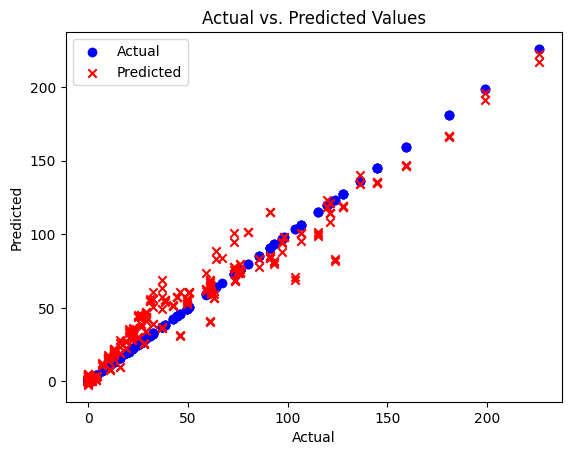

In [11]:
import matplotlib.pyplot as plt

# Scatter plot for actual values (y_test) in blue
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Scatter plot for predicted values (y_pred) in red
plt.scatter(y_test, y_pred, color='red', label='Predicted', marker='x')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


In [12]:
# Save the trained model
joblib.dump(model, 'ridge_regression_model.pkl')


['ridge_regression_model.pkl']

In [13]:
# Load the model
loaded_model = joblib.load('ridge_regression_model.pkl')

# Create a DataFrame for user input
user_input = pd.DataFrame({
    'Location': ['Lalmonirhat'],
    'Crop_Name': ['Maize'],
    'Soil_Type': ['Sandy'],
    'Yield': 12
})

# Map user input with the same mappings
user_input['Location'] = user_input['Location'].map(location_mapping)
user_input['Crop_Name'] = user_input['Crop_Name'].map(crop_mapping)
user_input['Soil_Type'] = user_input['Soil_Type'].map(soil_type_mapping)

# Ensure the columns are in the same order as the training data
user_input = user_input[['Location', 'Crop_Name', 'Soil_Type','Yield']]

# Make predictions
predicted_values = loaded_model.predict(user_input)

# Create DataFrames to display the results for nutrition and fertilizer recommendations
fertilizer_df = pd.DataFrame(predicted_values[:, 12:], columns=['Predicted Urea', 'Predicted MOP', 'Predicted TSP', 'Predicted Gypsum', 'Predicted Hepta Zinc', 'Predicted Boric Acid', 'Predicted Magnesium Sulphate'])

print("\nFertilizer Recommendations:")
print(fertilizer_df)


Fertilizer Recommendations:
   Predicted Urea  Predicted MOP  Predicted TSP  Predicted Gypsum  \
0      233.192861     113.199028       87.26411         77.681511   

   Predicted Hepta Zinc  Predicted Boric Acid  Predicted Magnesium Sulphate  
0              3.844344              0.530325                       0.50954  
